In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.model_selection import train_test_split

<Axes: xlabel='SAT', ylabel='GPA'>

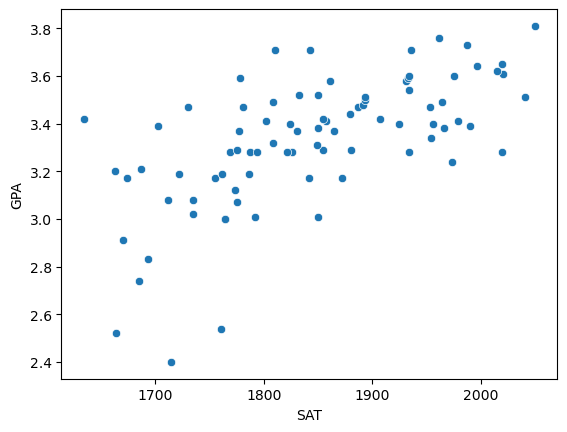

In [23]:
data=pd.read_csv("Simple linear regression.csv")

sns.scatterplot(x='SAT', y='GPA', data=data)

<Axes: xlabel='SAT', ylabel='GPA'>

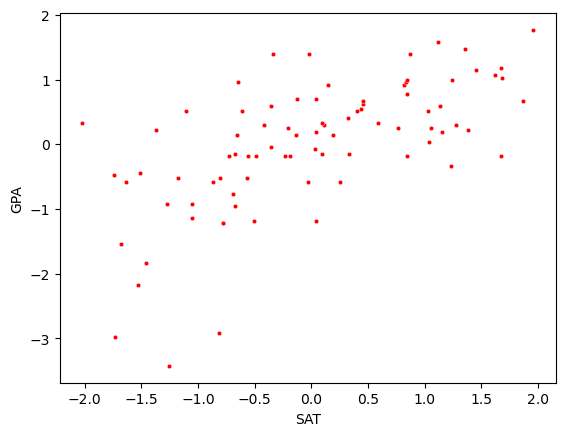

In [24]:
#scalling the data points
data['SAT']=(data['SAT']-data['SAT'].mean())/data['SAT'].std()
data['GPA']=(data['GPA']-data['GPA'].mean())/data['GPA'].std()
sns.scatterplot(x='SAT', y='GPA', data=data, color='red', s=10)

In [51]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values.reshape(-1,1)



In [52]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)



In [71]:
from sklearn.linear_model import LinearRegression 
model_in_build=LinearRegression()
model_in_build.fit(x_train, y_train)

LinearRegression()

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred=model_in_build.predict(x_test)
print("Mean square error:", mean_squared_error(y_test, y_pred))

Mean square error: 0.7114266439627519


In [56]:
print(np.max(x))

1.9585276582487183


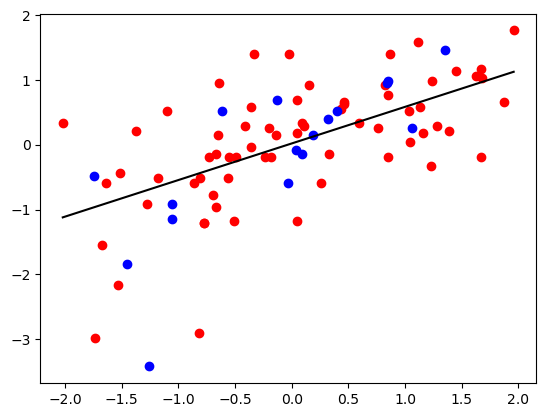

In [73]:
x_line=np.linspace(np.min(x),np.max(x),100)
y_line_pred=model_in_build.predict(x_line.reshape(-1,1))
plt.scatter(x_train, y_train, color='red')
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_line, y_line_pred, color='black')


two_dimensional_array = np.array([[1, 2], [3, 4], [5, 6]])
one_dimensional_array= np.array([[1],[6]])
result=np.dot(two_dimensional_array, one_dimensional_array)
result

In [ ]:
class linear_regression:

    def __init__(self, epoch, alpha=0.00001):
        self.epoch=epoch
        self.alpha=alpha
        self.weight=None
        self.cost_array=[]
        self.training_error=[]
        self.test_error=[]

    def fit(self, x,y):
        sample, features=x.shape
        x = np.hstack((np.ones((sample, 1)), x))
        self.weight=np.zeros((features+1,1))

        for i in range(self.epoch):
            x_theta=x.dot(self.weight)
            error=x_theta-y  
            gradient=(1/sample)*x.T.dot(error)
            cost=(1/(2*sample))*np.sum(error**2)
            self.cost_array.append(cost)
            self.weight-=self.alpha*gradient
            self.training_error.append(np.sqrt(cost))
           


    

    def predict(self, x):
        
        sample, features=x.shape
        x=np.hstack((np.ones((sample,1)),x))
        y_pred=x.dot(self.weight)
        return y_pred
    

In [112]:
model=linear_regression(epoch=1000, alpha=0.01)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print('r2_score:', r2_score(y_test, y_pred))

r2_score: 0.4694815183089376


In [113]:
model.weight

array([[0.02125834],
       [0.56520262]])

<Axes: xlabel='SAT', ylabel='GPA'>

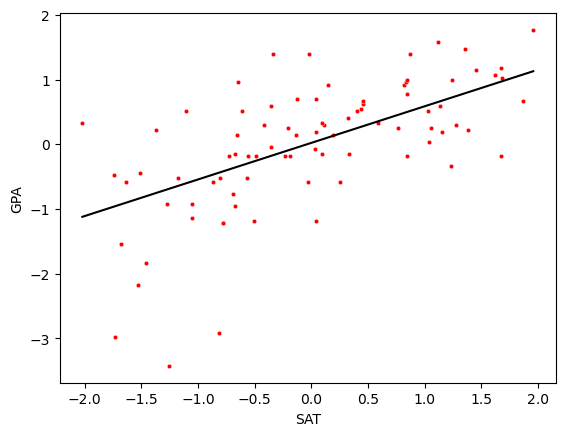

In [114]:
sns.scatterplot(x='SAT', y='GPA', data=data, color='red', s=10)

x_line = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)  
y_pred = model.predict(x_line)

sns.lineplot(x=x_line.flatten(), y=y_pred.flatten(), color='black')


In [115]:
print("in build model weight:", model_in_build.coef_)
print("in build model intercept:", model_in_build.intercept_)
print("Scartch model weight:", model.weight[1:])
print("Scartch model intercept:", model.weight[0])

in build model weight: [[0.56522166]]
in build model intercept: [0.02125217]
Scartch model weight: [[0.56520262]]
Scartch model intercept: [0.02125834]


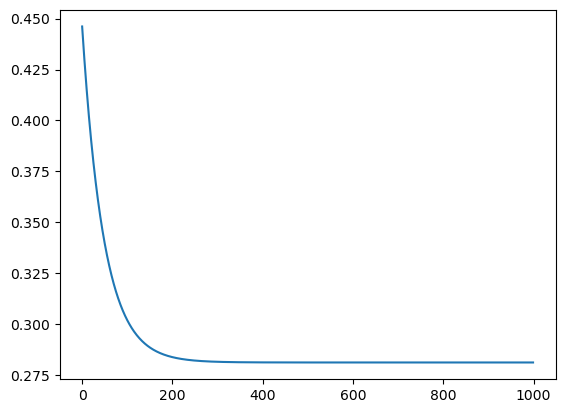

In [116]:
cost= model.cost_array
plt.plot(range(len(cost)), cost)

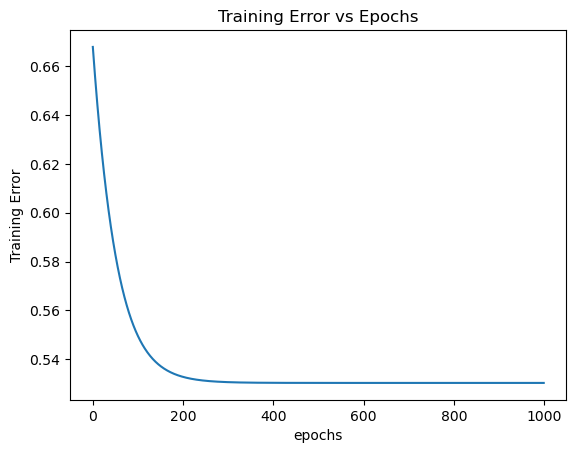

In [119]:
training_error=model.training_error
plt.plot(range(len(training_error)), training_error, label='Training Error')
plt.xlabel('epochs')
plt.title('Training Error vs Epochs')
plt.ylabel('Training Error')
plt.show()